In [1]:
# Import the HTRU2 dataset from UCI.
import pandas as pd
HTRU = pd.read_csv('HTRU_2.csv', sep=',', decimal='.', header=None, names=['mean_ip', 'sd_ip', 'kurtosis_ip', 'Skewness_ip', 'mean_DM-SNR', 'sd_DM-SNR', 'kurtosis_DM-SNR', 'Skewness_DM-SNR', 'Class'])
HTRU.head(10)

,mean_ip,sd_ip,kurtosis_ip,Skewness_ip,mean_DM-SNR,sd_DM-SNR,kurtosis_DM-SNR,Skewness_DM-SNR,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [2]:
# The total number of rows and columns in the HTRU dataset.
HTRU.shape

(17898, 9)

In [3]:
# Change the dataframe HTRU to an array htru
htru = HTRU.values
# Assign the 8 feature columns to a variable named hdata
hdata = htru[:,:8]
print hdata.shape
# Assign the Class column to a variable named htarget.
htarget = htru[:,8]
print htarget.shape

(17898L, 8L)
(17898L,)


In [4]:
# Split the HTRU dataset into Test set (40%) and Training set(60%)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hdata, htarget, test_size=0.40, random_state=4)

C:\Users\Ana\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# The 40% of total 17898 rows are 7159.2 rows which are approx. 7160 rows, so the shapes of the train/test sets are correct.
print X_train.shape 
print X_test.shape
print y_train.shape
print y_test.shape

(10738L, 8L)
(7160L, 8L)
(10738L,)
(7160L,)


In [56]:
# Train K Nearest Neighbor model firstly
# Start with default model
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

# Create the confusion matrix for predicted values against existing values of y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print cm
print('')
print "Classification error rate =" + str(float(127+62)/7160)
print('')

# print the score of this classification.
print "[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test))
print('')

# Print the classification report
from sklearn.metrics import classification_report
print classification_report(y_test,predicted)

[[6504   62]
 [ 127  467]]

Classification error rate =0.0263966480447

[Train/test split] score: 0.97360

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      6566
        1.0       0.88      0.79      0.83       594

avg / total       0.97      0.97      0.97      7160



In [7]:
# Use the Hill Climb Technique to extract more relevant features:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 8
col_Ind_Random = shuffle(range(0,col_num), random_state=8)

for cur_f in range(0, col_num):
   new_Ind.append(col_Ind_Random[cur_f])
   newhd = hdata[:, new_Ind]
   X_train, X_test, y_train, y_test = train_test_split(newhd, htarget, test_size=0.4, random_state=0)
   clf = KNeighborsClassifier(200, weights='uniform', p=2)
   fit = clf.fit(X_train, y_train)
   cur_Score = clf.score(X_test, y_test)
   if cur_Score < cur_MaxScore:
      new_Ind.remove(col_Ind_Random[cur_f])
   else:
        cur_MaxScore = cur_Score
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score)
        
print ('')
print "There are " + str(len(new_Ind)) + " features selected:"
print ('')
print new_Ind

Score with 1 selected features: 0.9203910614525139
Score with 2 selected features: 0.9722067039106145
Score with 3 selected features: 0.9722067039106145
Score with 4 selected features: 0.9722067039106145
Score with 5 selected features: 0.9736033519553072
Score with 6 selected features: 0.9736033519553072
Score with 7 selected features: 0.9736033519553072

There are 7 features selected:

[7, 0, 2, 6, 5, 1, 3]


In [8]:
# Ran Hill Climbe 8 times and obtained the frequency of each feature being selected
# Feature 2 was selected for 8 times
# Feature 3 was selected for 7 times
# Feature 6 was selected for 6 times
# Feature 0 was selected for 5 times
# Feature 1,4,5,7 were selected for 4 times
# All features have been selected for at least 4 times hence all will be used for the model.

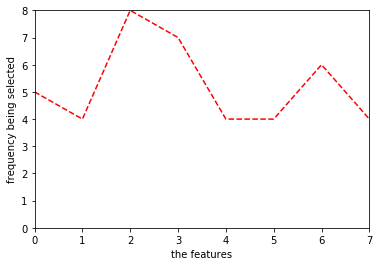

In [69]:
# visualise the frequency of each feature being selected
import matplotlib.pyplot as plt
plt.plot([0,1,2,3,4,5,6,7], [5,4,8,7,4,4,6,4],  'r--')
plt.axis([0, 7, 0, 8])
plt.xlabel('the features')
plt.ylabel('frequency being selected')
plt.show()

The optimal number of neighbors is 9


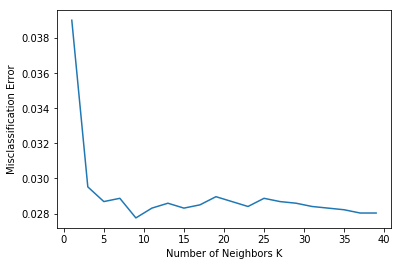

In [49]:
## Tune parameters
from sklearn.model_selection import cross_val_score
##KNN Modelling-> n_neighbours
myList = list(range(1,40))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold cv scores
cv_scores = []
# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
# plot the misclassification error versus K.
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [55]:
clf = KNeighborsClassifier(9)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print confusion_matrix(y_test,predicted)
print('')
print "Classification error rate =" + str(float(130+55)/7160)
print('')
print "[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test))
print('')
print classification_report(y_test,predicted)

[[6511   55]
 [ 130  464]]

Classification error rate =0.0258379888268

[Train/test split] score: 0.97416

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      6566
        1.0       0.89      0.78      0.83       594

avg / total       0.97      0.97      0.97      7160



In [63]:
# Tune Parameter weight, make it equal to distance and uniform
# K = 9 gave the highest precision
clf = KNeighborsClassifier(9, weights='distance')
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)   
print confusion_matrix(y_test, predicted)
print('')
print "Classification error rate =" + str(float(196+19)/7160)
print('')
print classification_report(y_test,predicted)

[[6509   57]
 [ 131  463]]

Classification error rate =0.0300279329609

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      6566
        1.0       0.89      0.78      0.83       594

avg / total       0.97      0.97      0.97      7160



In [64]:
clf = KNeighborsClassifier(9, weights='uniform')
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)   
print confusion_matrix(y_test, predicted)
print('')
print "Classification error rate =" + str(float(130+55)/7160)
print('')
print classification_report(y_test,predicted)

[[6511   55]
 [ 130  464]]

Classification error rate =0.0258379888268

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      6566
        1.0       0.89      0.78      0.83       594

avg / total       0.97      0.97      0.97      7160



In [61]:
clf = KNeighborsClassifier(9, weights='uniform', p= 1)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)   
print confusion_matrix(y_test, predicted)
print('')
print "Classification error rate =" + str(float(133+45)/7160)
print('')
print classification_report(y_test,predicted)

[[6521   45]
 [ 133  461]]

Classification error rate =0.0248603351955

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      6566
        1.0       0.91      0.78      0.84       594

avg / total       0.97      0.98      0.97      7160



In [60]:
clf = KNeighborsClassifier(9, weights='uniform', p= 2)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)   
print confusion_matrix(y_test, predicted)
print('')
print "Classification error rate =" + str(float(130+55)/7160)
print('')
print classification_report(y_test,predicted)

[[6511   55]
 [ 130  464]]

Classification error rate =0.0258379888268

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      6566
        1.0       0.89      0.78      0.83       594

avg / total       0.97      0.97      0.97      7160



In [24]:
# Explore each feature
HTRU.describe()

,mean_ip,sd_ip,kurtosis_ip,Skewness_ip,mean_DM-SNR,sd_DM-SNR,kurtosis_DM-SNR,Skewness_DM-SNR,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


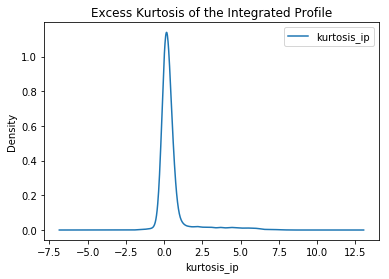

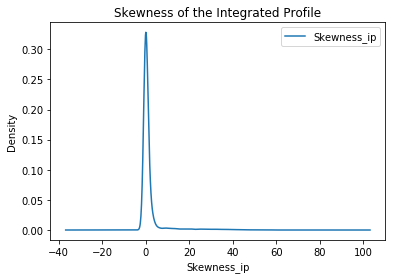

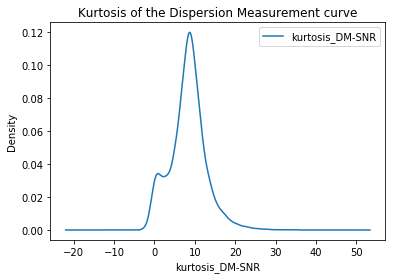

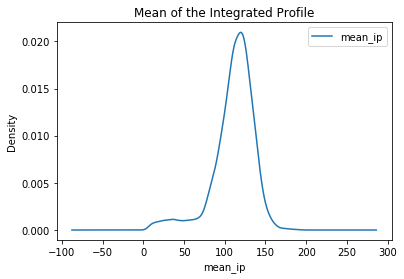

In [65]:
# The first four important features
import matplotlib.pyplot as plt
HTRU['kurtosis_ip'].plot(kind='density', title='Excess Kurtosis of the Integrated Profile', legend=True)
plt.xlabel('kurtosis_ip')
plt.show()

HTRU['Skewness_ip'].plot(kind='density', title='Skewness of the Integrated Profile', legend=True)
plt.xlabel('Skewness_ip')
plt.show()

HTRU['kurtosis_DM-SNR'].plot(kind='density', title='Kurtosis of the Dispersion Measurement curve', legend=True)
plt.xlabel('kurtosis_DM-SNR')
plt.show()

HTRU['mean_ip'].plot(kind='density', title='Mean of the Integrated Profile', legend=True)
plt.xlabel('mean_ip')
plt.show()

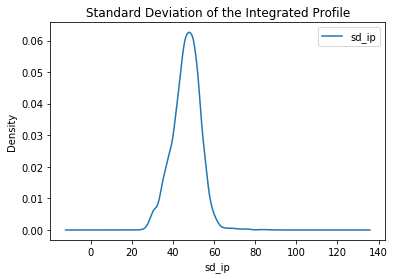

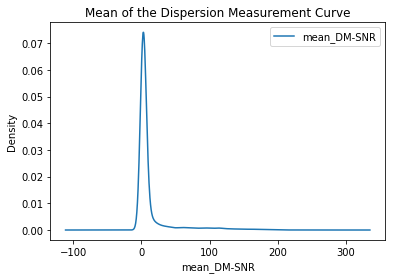

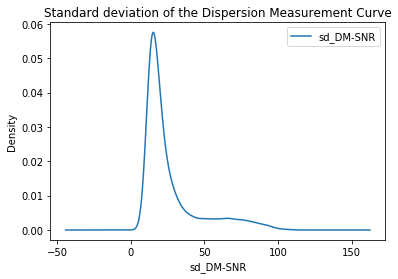

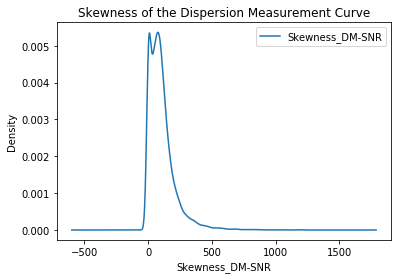

In [26]:
# The rest four features  
HTRU['sd_ip'].plot(kind='density', title='Standard Deviation of the Integrated Profile', legend=True)
plt.xlabel('sd_ip')
plt.show()

HTRU['mean_DM-SNR'].plot(kind='density', title='Mean of the Dispersion Measurement Curve', legend=True)
plt.xlabel('mean_DM-SNR')
plt.show()

HTRU['sd_DM-SNR'].plot(kind='density', title='Standard deviation of the Dispersion Measurement Curve', legend=True)
plt.xlabel('sd_DM-SNR')
plt.show()

HTRU['Skewness_DM-SNR'].plot(kind='density', title='Skewness of the Dispersion Measurement Curve', legend=True)
plt.xlabel('Skewness_DM-SNR')
plt.show()

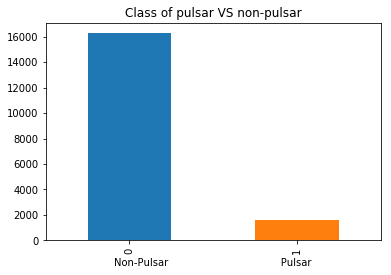

In [27]:
# The target vairable 
HTRU['Class'].value_counts().plot(kind='bar', title='Class of pulsar VS non-pulsar')
plt.xlabel('Non-Pulsar                                    Pulsar')
plt.show()

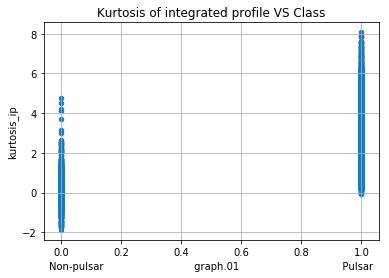

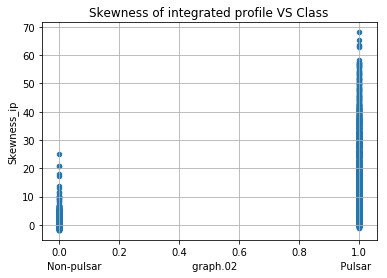

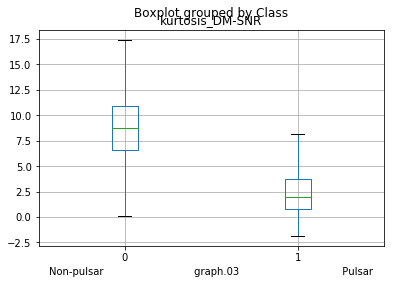

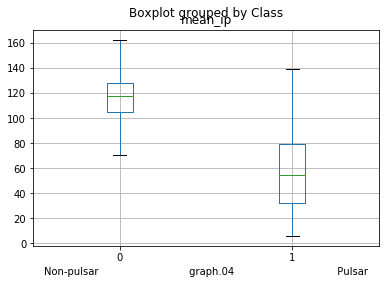

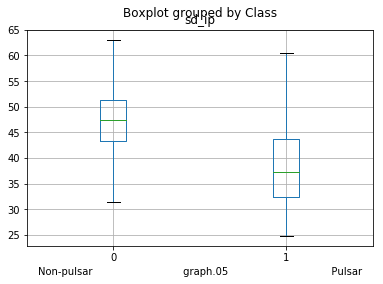

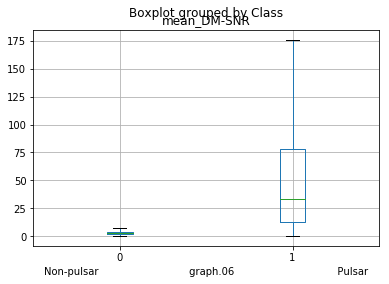

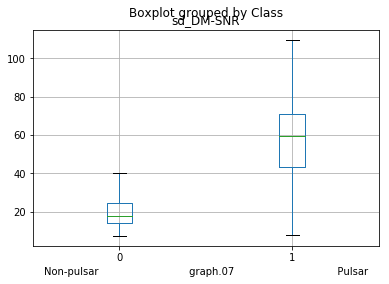

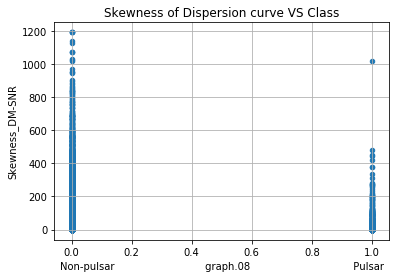

In [28]:
# Explore relationship between features and the target vairable
HTRU.plot(kind='scatter', x='Class', y='kurtosis_ip', title='Kurtosis of integrated profile VS Class', legend=True,grid = True)
plt.xlabel('Non-pulsar                             graph.01                                 Pulsar')
plt.show() 

HTRU.plot(kind='scatter', x='Class', y='Skewness_ip', title='Skewness of integrated profile VS Class', legend=True, grid = True)
plt.xlabel('Non-pulsar                             graph.02                                 Pulsar')
plt.show()

HTRU.boxplot(column = 'kurtosis_DM-SNR', by = 'Class',showfliers=False)
plt.xlabel('Non-pulsar                             graph.03                                 Pulsar')
plt.show()

HTRU.boxplot(column = 'mean_ip', by = 'Class',showfliers=False)
plt.xlabel('Non-pulsar                             graph.04                                 Pulsar')
plt.show()

HTRU.boxplot(column = 'sd_ip', by = 'Class',showfliers=False)
plt.xlabel('Non-pulsar                             graph.05                                 Pulsar')
plt.show()

HTRU.boxplot(column = 'mean_DM-SNR', by = 'Class',showfliers=False)
plt.xlabel('Non-pulsar                             graph.06                                 Pulsar')
plt.show()

HTRU.boxplot(column = 'sd_DM-SNR', by = 'Class',showfliers=False)
plt.xlabel('Non-pulsar                             graph.07                                 Pulsar')
plt.show()

HTRU.plot(kind='scatter', x='Class', y='Skewness_DM-SNR', title='Skewness of Dispersion curve VS Class', legend=True,grid = True)
plt.xlabel('Non-pulsar                             graph.08                                 Pulsar')
plt.show()

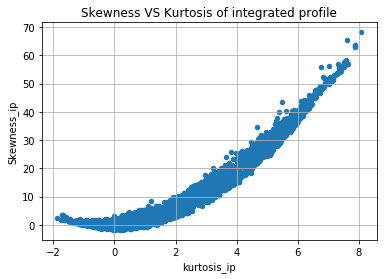

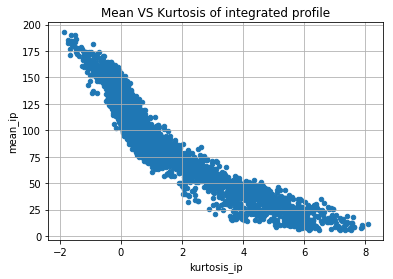

In [68]:
# explore the relationship between the two most important features according to Hill-Climb selection
HTRU.plot(kind='scatter', x='kurtosis_ip', y='Skewness_ip', title='Skewness VS Kurtosis of integrated profile', legend=True,grid = True)
# explore the relationship between the most important feature and the less important feature
HTRU.plot(kind='scatter', x='kurtosis_ip', y='mean_ip', title='Mean VS Kurtosis of integrated profile', legend=True,grid = True)
plt.show()

In [74]:
# Use Decision Tree model to classify the pulsar candidates again.

# If apply decision tree on the original 8 features:
htru2 = HTRU.values
hdata2 = htru2[:,:8]
htarget2 = htru2[:,8]
X_train2, X_test2, y_train2, y_test2 = train_test_split(hdata2,htarget2,test_size=0.40,random_state=4)

# firstly rn the default model
from sklearn.tree import DecisionTreeClassifier  
clf2 = DecisionTreeClassifier()
fit2 = clf2.fit(X_train2, y_train2)
y_pre2 = fit2.predict(X_test2) 

print confusion_matrix(y_test2, y_pre2)
print ('')
print "Classification error rate =" + str(float(95+116)/7160)
print ('')
print classification_report(y_test2,y_pre2)
# the default model with default values will not be used since it classifies so differently each time

[[6401  124]
 [  96  539]]

Classification error rate =0.029469273743

             precision    recall  f1-score   support

        0.0       0.99      0.98      0.98      6525
        1.0       0.81      0.85      0.83       635

avg / total       0.97      0.97      0.97      7160



In [78]:
# Adding a parameter criterion = 'entropy' has increased the precision for predicting real pulsars.
clf2 = DecisionTreeClassifier(criterion = 'entropy')
fit2 = clf2.fit(X_train2, y_train2)
y_pre2 = fit2.predict(X_test2) 

print confusion_matrix(y_test2, y_pre2)
print('')
print "Classification error rate =" + str(float(98+115)/7160)
print('')
print classification_report(y_test2,y_pre2)
# Entropy will not be used since it classifies so differently each time

[[6400  125]
 [  93  542]]

Classification error rate =0.029748603352

             precision    recall  f1-score   support

        0.0       0.99      0.98      0.98      6525
        1.0       0.81      0.85      0.83       635

avg / total       0.97      0.97      0.97      7160



In [77]:
# Adding parameters mx_depth and min_samples_split.
# try with min_samples_leaf = 20
clf2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, min_samples_split = 20)
fit2 = clf2.fit(X_train2, y_train2)
y_pre2 = fit2.predict(X_test2)

print confusion_matrix(y_test2, y_pre2)
print('')
print "Classification error rate =" + str(float(93+88)/7160)
print('')
print classification_report(y_test2,y_pre2)

[[6438   87]
 [  93  542]]

Classification error rate =0.0252793296089

             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      6525
        1.0       0.86      0.85      0.86       635

avg / total       0.97      0.97      0.97      7160



In [79]:
# try with min_samples_leaf = 50
clf2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, min_samples_split = 50)
fit2 = clf2.fit(X_train2, y_train2)
y_pre2 = fit2.predict(X_test2)
print confusion_matrix(y_test2, y_pre2)
print classification_report(y_test2,y_pre2)

[[6465   60]
 [ 111  524]]
             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      6525
        1.0       0.90      0.83      0.86       635

avg / total       0.98      0.98      0.98      7160



In [43]:
# To visualize the decision tree results

# The 8 feature names:
print HTRU.columns [:8]
print "-----------------------"
# The names of the 2 classess:
dict = {0: "Non-pulsar", 1: "Pulsar"}
a = (dict[0], dict[1])
print a 

# Save the tree graph to htru.dot and visualize it on https://dreampuf.github.io/GraphvizOnline/
from sklearn import tree
with open('htru.dot', 'w') as f:
        f = tree.export_graphviz(clf2, out_file=f, feature_names = HTRU.columns [:8], class_names=a , filled=True, rounded=True, special_characters=True)

Index([u'mean_ip', u'sd_ip', u'kurtosis_ip', u'Skewness_ip', u'mean_DM-SNR',
       u'sd_DM-SNR', u'kurtosis_DM-SNR', u'Skewness_DM-SNR'],
      dtype='object')
-----------------------
('Non-pulsar', 'Pulsar')


In [44]:
# codes needed for previous cell
print HTRU.columns [:8]
print ('')
# The names of the 2 classess:
dict = {0: "Non-pulsar", 1: "Pulsar"}
a = (dict[0], dict[1])
print a, '\n'

Index([u'mean_ip', u'sd_ip', u'kurtosis_ip', u'Skewness_ip', u'mean_DM-SNR',
       u'sd_DM-SNR', u'kurtosis_DM-SNR', u'Skewness_DM-SNR'],
      dtype='object')

('Non-pulsar', 'Pulsar') 



In [46]:
###Random Forest default
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier()
fit3 = clf3.fit(X_train, y_train)
y_pred3 = fit3.predict(X_test)

print confusion_matrix(y_test, y_pre2)
print classification_report(y_test,y_pre2)

[[6024  542]
 [ 532   62]]
             precision    recall  f1-score   support

        0.0       0.92      0.92      0.92      6566
        1.0       0.10      0.10      0.10       594

avg / total       0.85      0.85      0.85      7160

